In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
random.seed(404)

## Задание

Рассмотреть выборки данных с помощью boxplot (т.е. найти коэф - медиану, среднее, отклонение, размах): 
1. [0, 16000] - сырой датасет (из `get_dataset.py`)
2. данные после mfcc (из `get_dataset.py`). 
3. `dat` из `eval_quantized_model.py`
4. `dat_q` из `eval_quantized_model.py`

#### Функции для анализа

In [33]:
from typing import List, Any

In [31]:
def get_metrics(data: np.ndarray) -> None:
    data = pd.Series(data)
    print('median:', data.median())
    print('std:', data.std())
    print('min:', data.min()) 
    print('max:', data.max())

In [34]:
def open_file(filename: str) -> Any:
    with open(f'{filename}.pickle', 'rb') as handle:
        data = pickle.load(handle)
    return data

In [35]:
def concat(data: List, samples: int=0) -> np.ndarray:
    if samples != 0:
        random.shuffle(data)
        arr = np.concatenate(data[:samples],axis=0)
    else:
        arr = np.concatenate(data,axis=0)
        
    print('Previous data shape:', arr.shape)
    while len(arr.shape) > 2:
        arr = np.concatenate(arr,axis=0)
    print('Current data shape', arr.shape)  

    return arr.reshape((arr.shape[0],))

### 1. Сырой датасет

In [36]:
ds_train_1 = open_file('ds_train_1')

Вот так выглядит распределение одного образца:

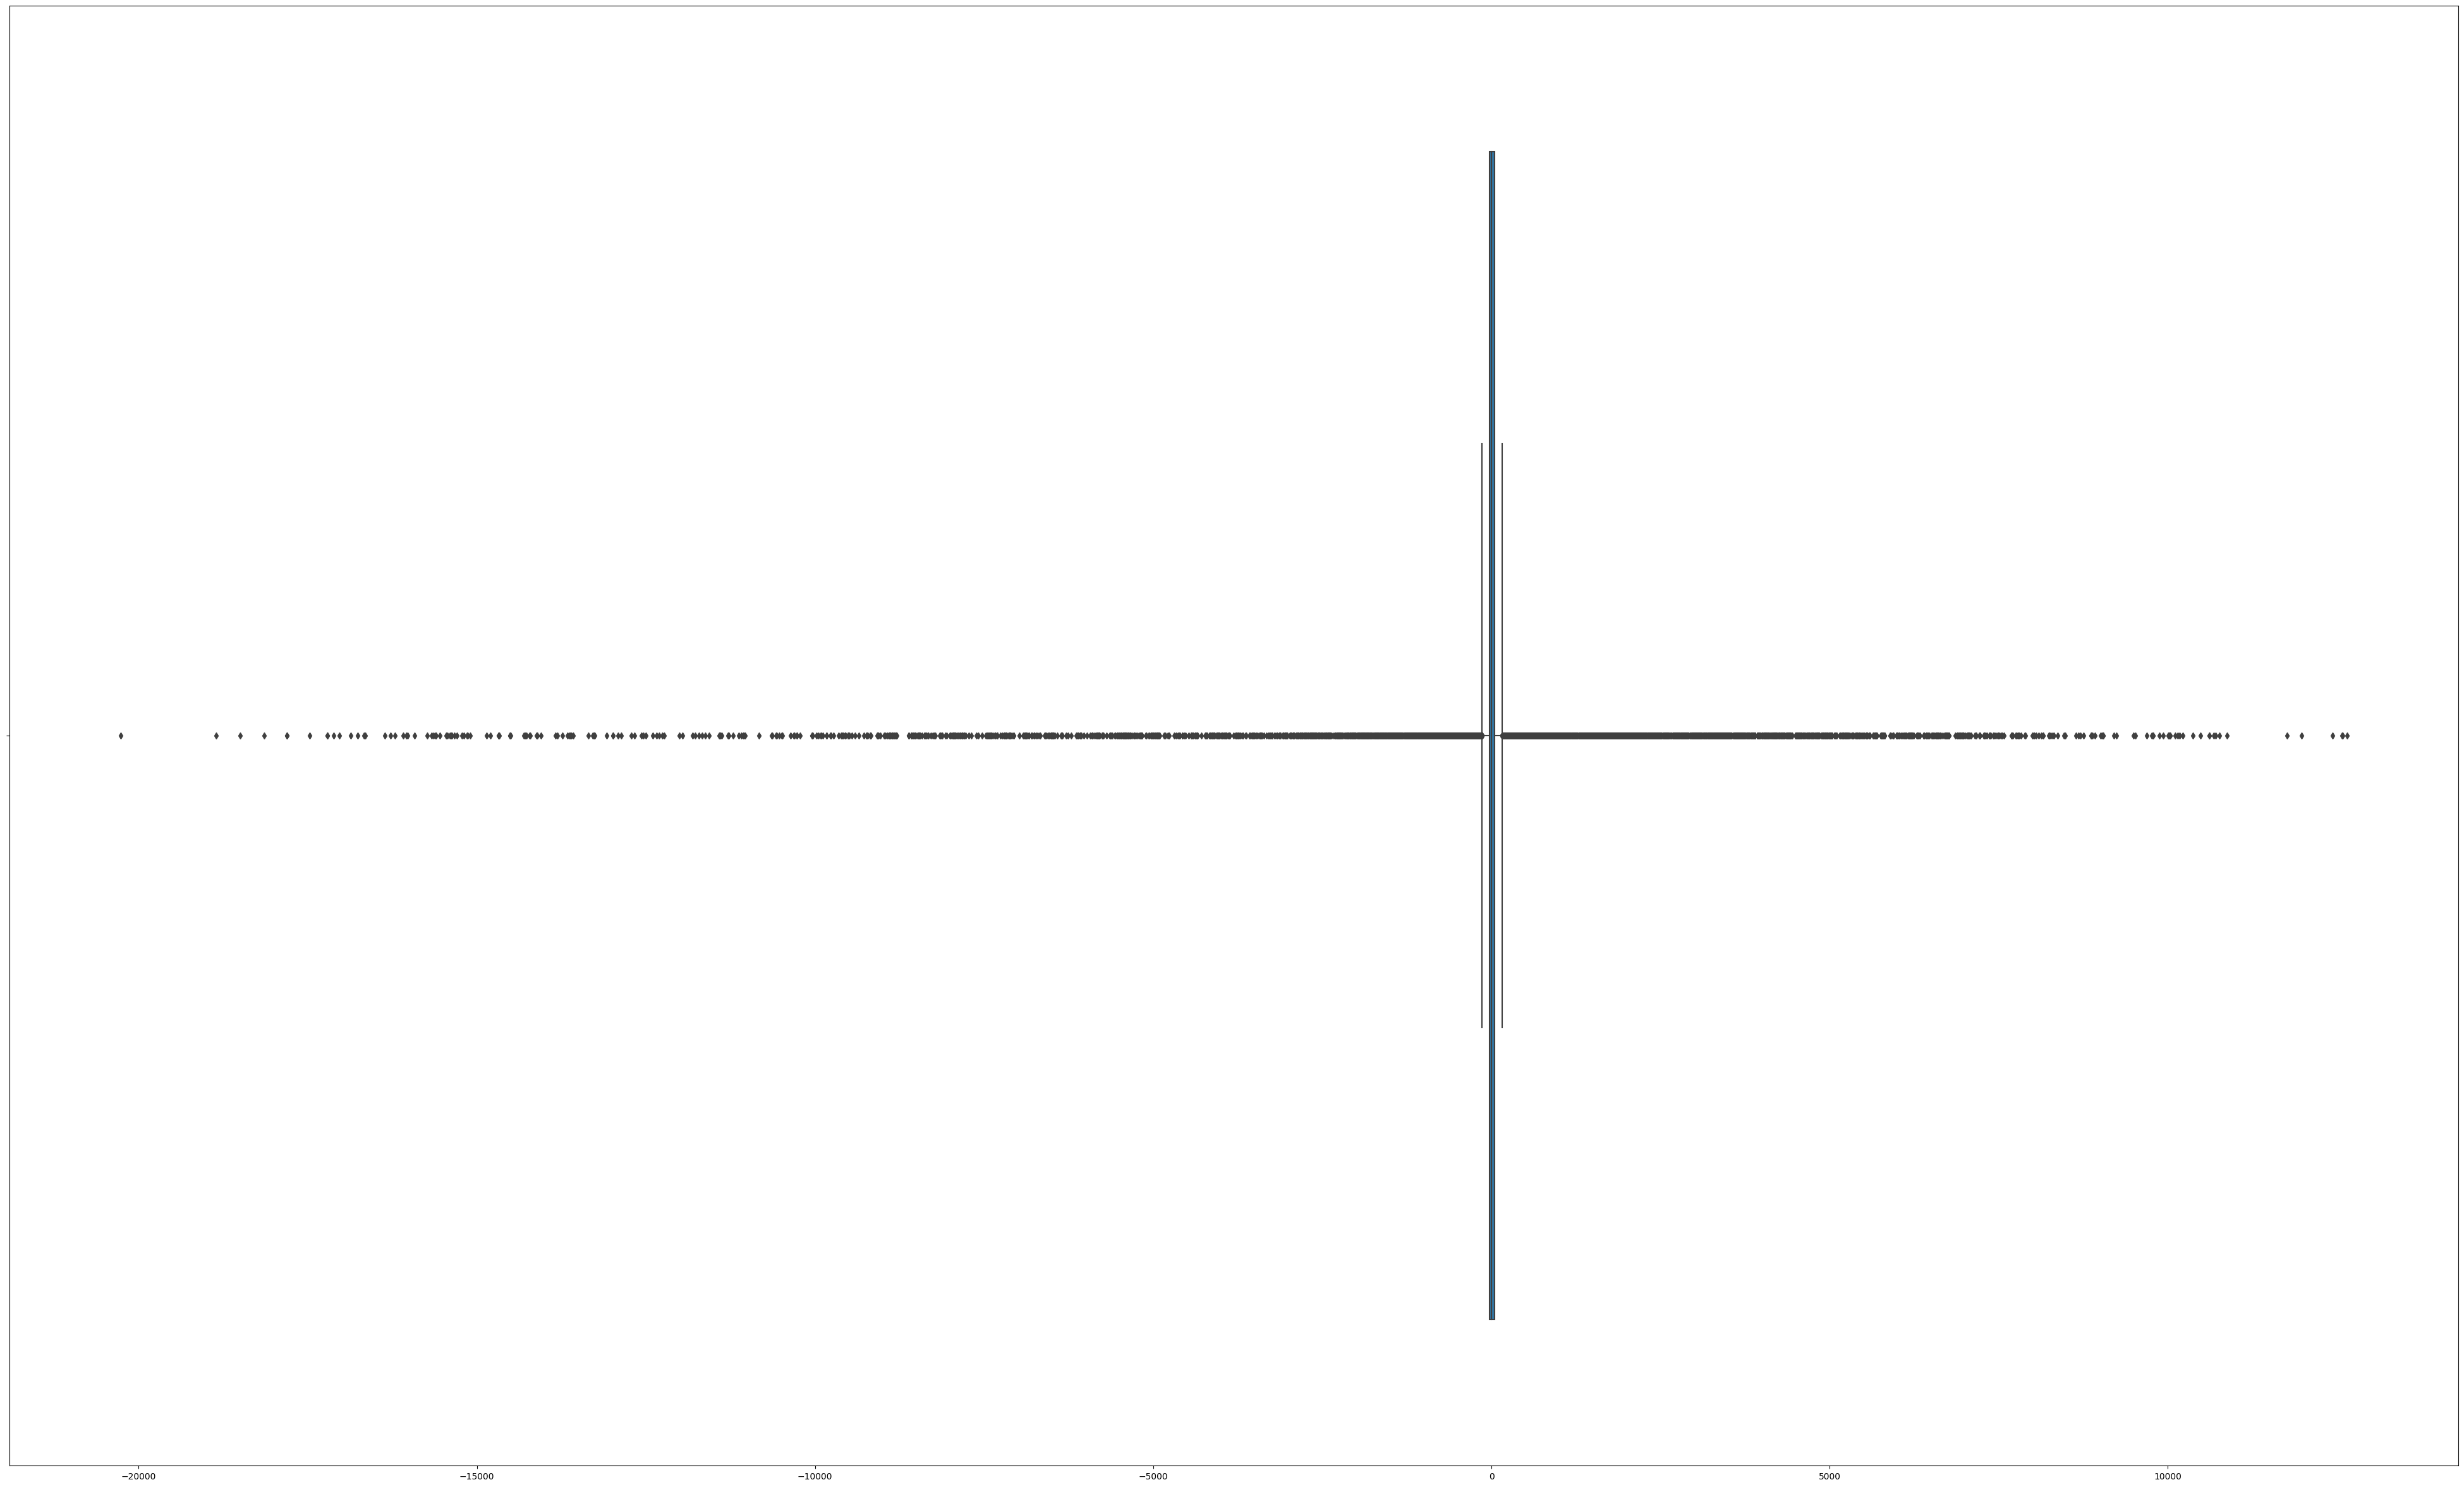

In [39]:
plt.figure(figsize=(50,30))
sns.boxplot(x=ds_train_1[0]);

Здесь совмещено 20 выборок из датасета:

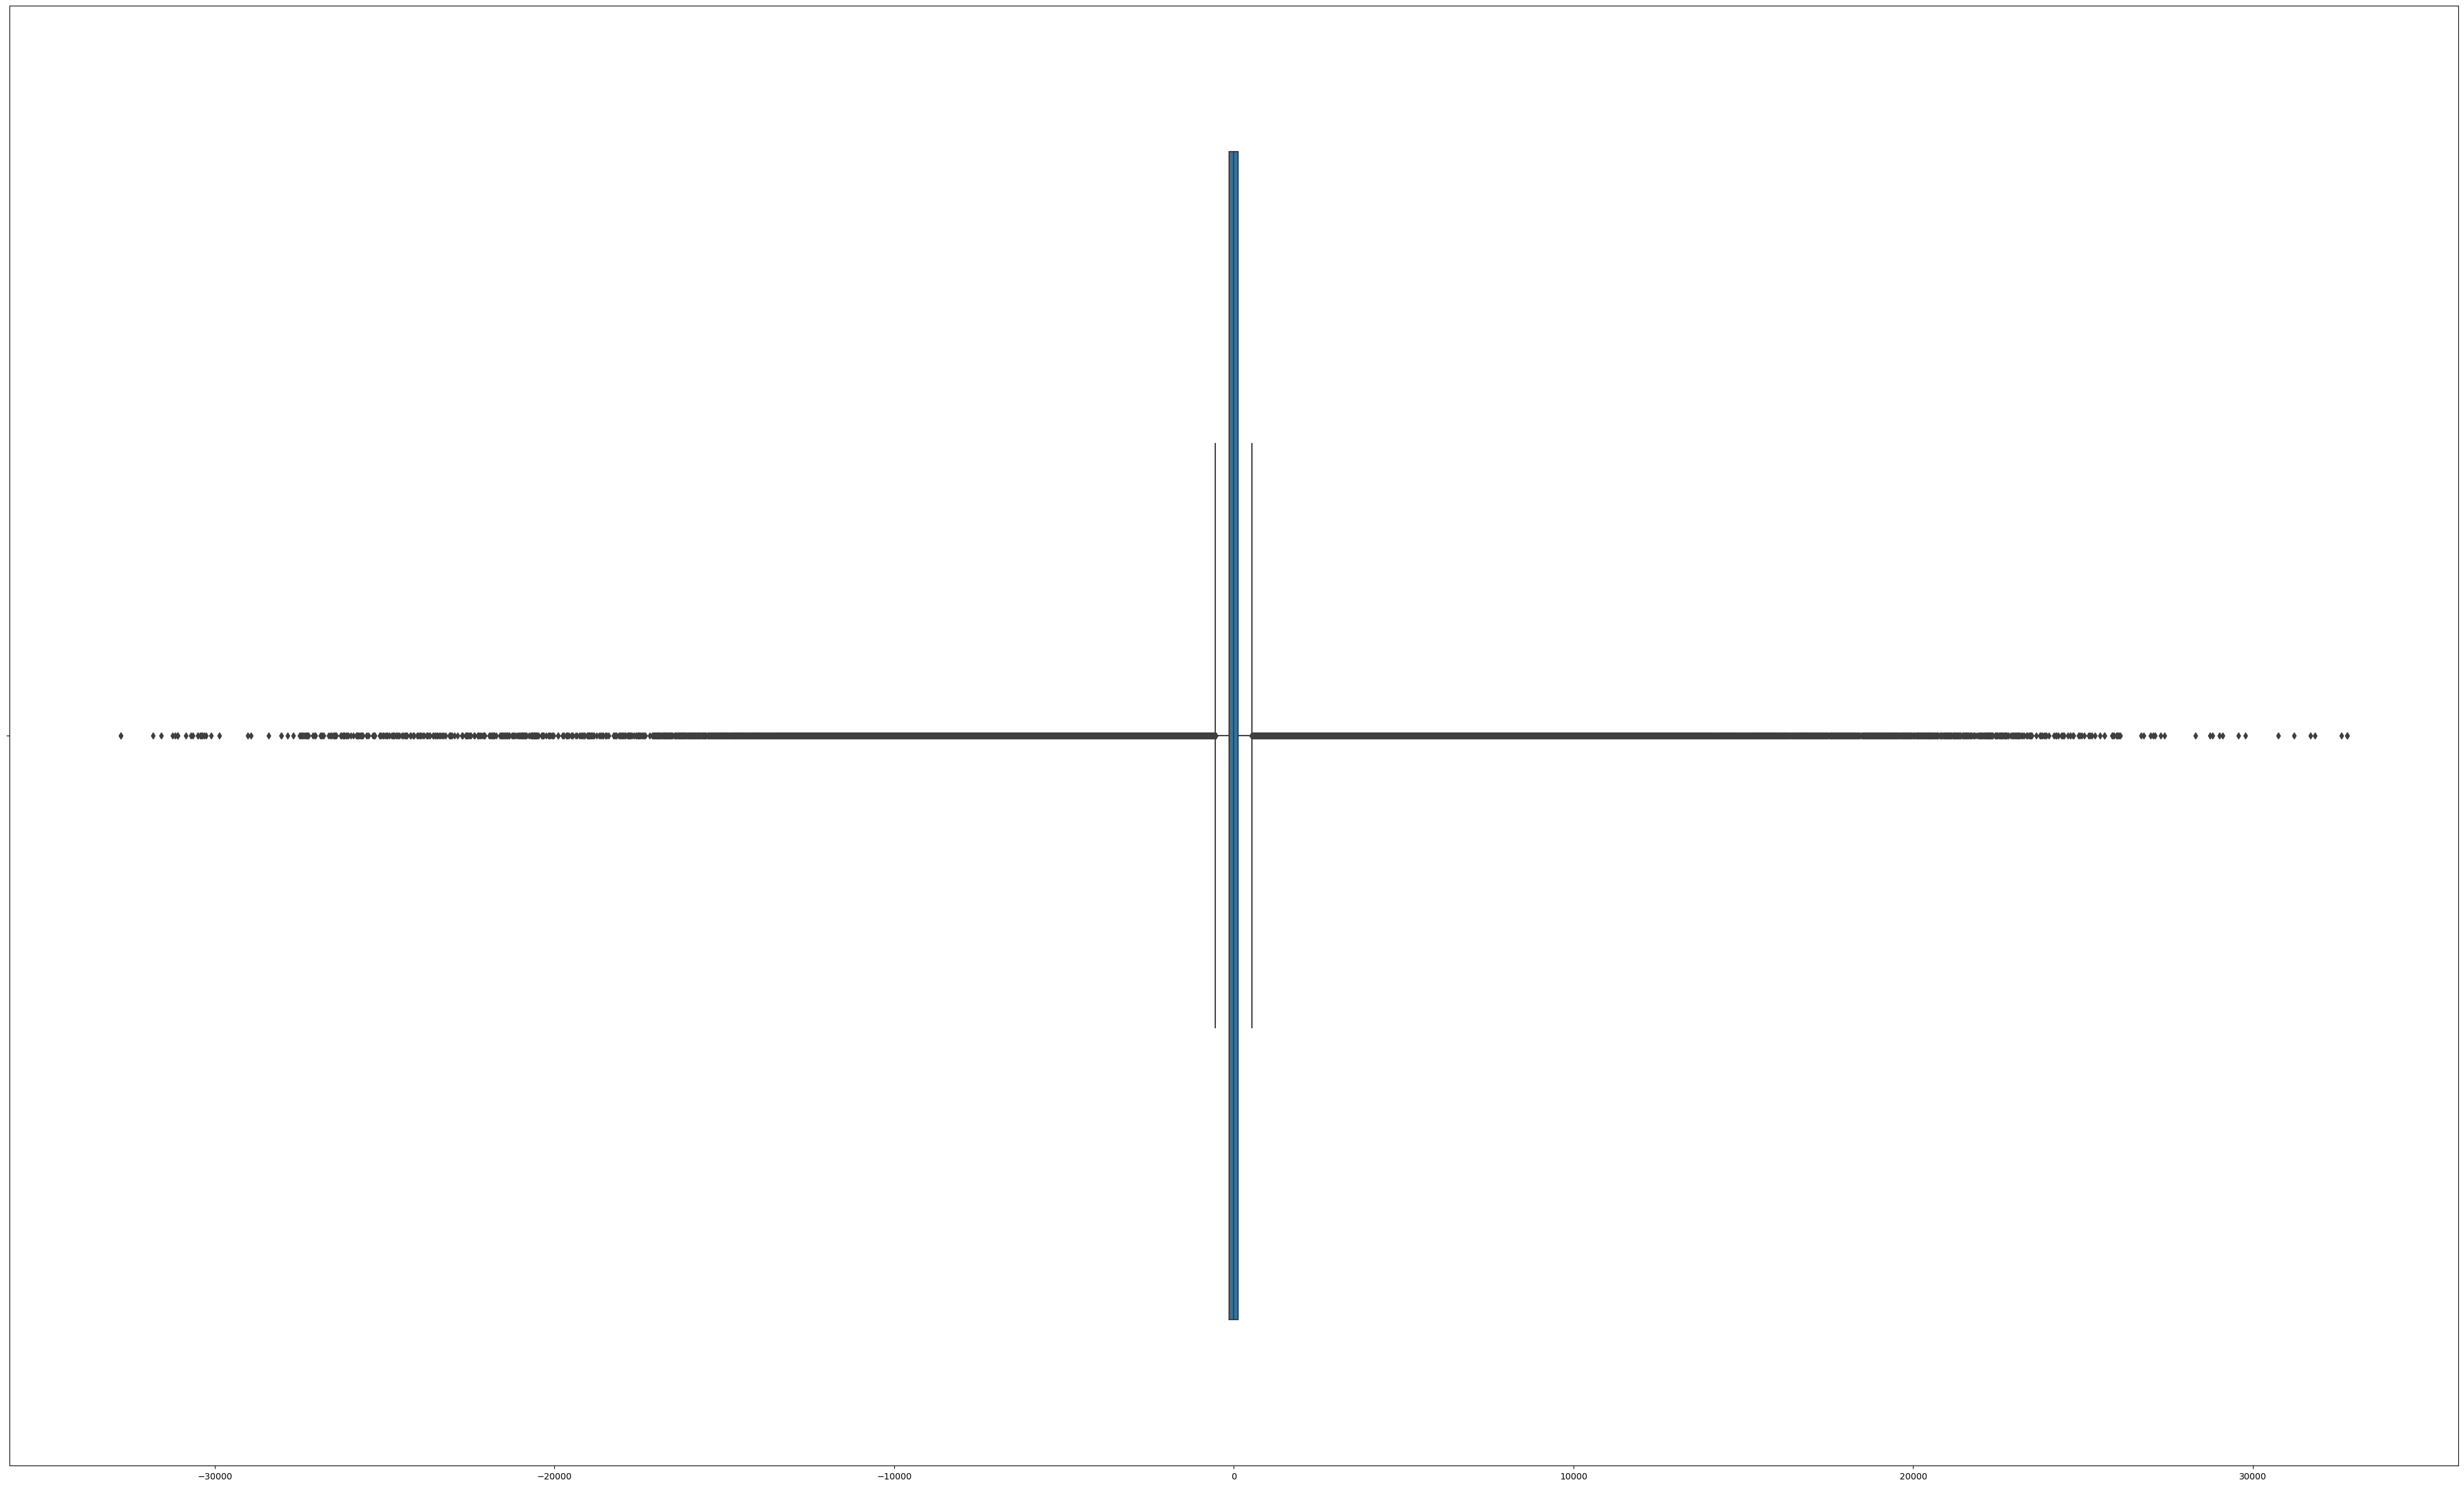

In [37]:
random.shuffle(ds_train_1)
arr = np.concatenate(ds_train_1[:20],axis=0)
plt.figure(figsize=(50,30))
sns.boxplot(x=arr);

In [38]:
get_metrics(arr)

median: 0.0
std: 2444.325299572718
min: -32768
max: 32767


### 2. После mfcc

In [39]:
ds_train_2 = open_file('ds_train_2')

Распределение одного образца из датасета:

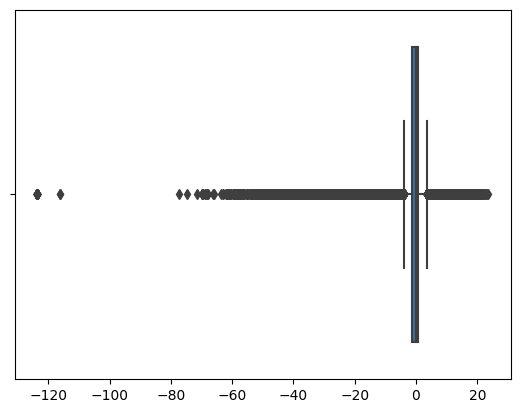

In [40]:
sns.boxplot(x=ds_train_2[0]);

In [41]:
arr_2_20 = concat(ds_train_2, 20)
arr_2 = concat(ds_train_2)

Previous data shape: (2000, 49, 10, 1)
Current data shape (980000, 1)
Previous data shape: (85511, 49, 10, 1)
Current data shape (41900390, 1)


Распределение 20 образцов:

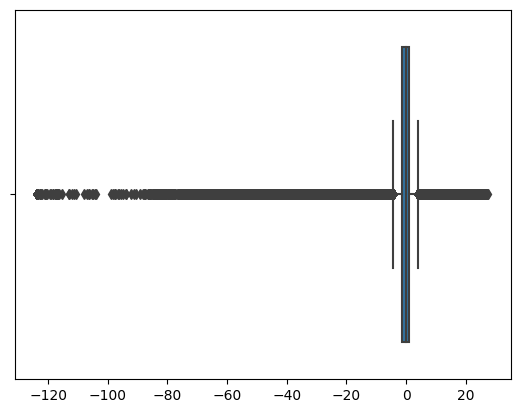

In [42]:
sns.boxplot(x=arr_2_20);

In [43]:
get_metrics(arr_2)

median: -0.1264165
std: 9.417766
min: -123.569725
max: 43.66766


### 3. `dat` из `eval_quantized_model.py`

In [44]:
dat_3 = open_file('dat_3')

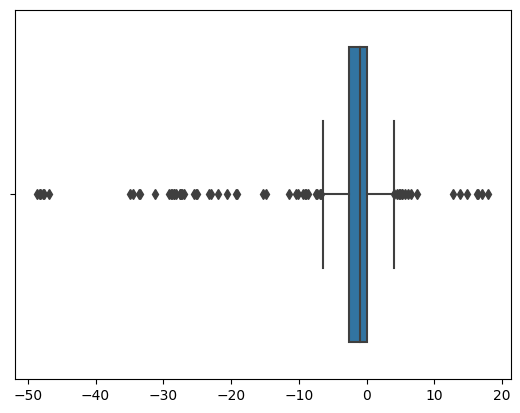

In [45]:
sns.boxplot(x=dat_3[0]);

Previous data shape: (20, 49, 10, 1)
Current data shape (9800, 1)


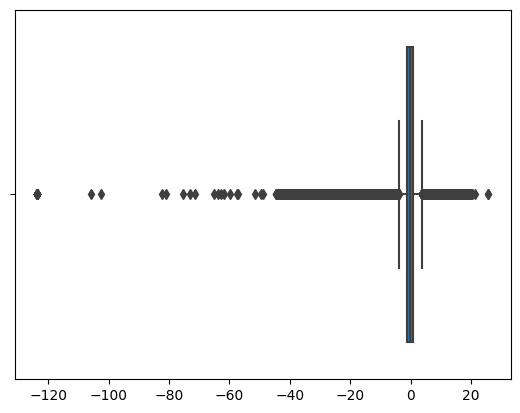

In [46]:
arr_3_20 = concat(dat_3, 20)
sns.boxplot(x=arr_3_20);

In [47]:
arr_3 = concat(dat_3)
get_metrics(arr_3)

Previous data shape: (4890, 49, 10, 1)
Current data shape (2396100, 1)
median: -0.11196774
std: 8.977561
min: -123.569725
max: 30.003954


### 4. `dat_q` из `eval_quantized_model.py`

In [48]:
dat_q_4 = open_file('dat_q_4')

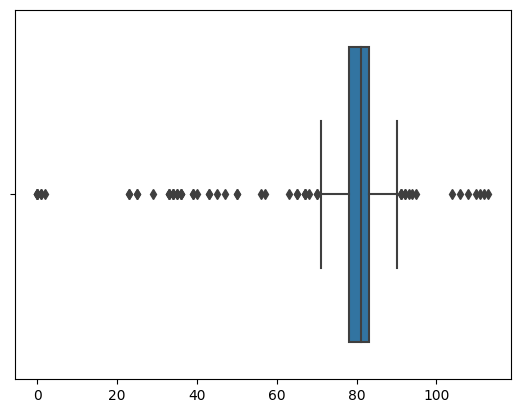

In [49]:
sns.boxplot(x=dat_q_4[0]);

In [50]:
arr_4 = concat(dat_q_4)
get_metrics(arr_4)

Previous data shape: (4890, 49, 10, 1)
Current data shape (2396100, 1)
median: 82.0
std: 15.333926074721495
min: -128
max: 127


## Вывод

| Metrics| #1 unprepared data | #2 after mfcc | #3 befor quant | #4 after quant |
|--------|:------------------:|:-------------:|:--------------:|:--------------:|
| median |                0.0 |    -0.1264165 |    -0.11196774 |           82.0 |
| std    |         2444.32529 |      9.417766 |       8.977561 |     15.3339260 |
| min    |             -32768 |   -123.569725 |    -123.569725 |           -128 |
| max    |              32767 |      43.66766 |      30.003954 |            127 |

Образцы #2 и #3 - это тренировочные и тестовые данные после mfcc.